<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [5]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv", index_col=0)

In [6]:
# Start coding here! Use as many cells as you like

**0.- Quick review of the dataframe with shape, head() and info()**

In [7]:
netflix_df.shape

(4812, 10)

In [8]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [9]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4812 entries, s2 to s7784
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          4812 non-null   object
 1   title         4812 non-null   object
 2   director      4812 non-null   object
 3   cast          4812 non-null   object
 4   country       4812 non-null   object
 5   date_added    4812 non-null   object
 6   release_year  4812 non-null   int64 
 7   duration      4812 non-null   int64 
 8   description   4812 non-null   object
 9   genre         4812 non-null   object
dtypes: int64(2), object(8)
memory usage: 413.5+ KB


**1.- What was the most frequent movie duration in the 1990s?**

In [12]:
#First, we approximate the most frequent movie duration in 1990s with the mode

netflix_df_dur_rel90 = netflix_df[(netflix_df["release_year"]>=1990) & (netflix_df["release_year"]<2000)]["duration"]
duration = netflix_df_dur_rel90.mode().iloc[0]
print(duration)

94


In [13]:
#Second, we sum the number of times that mode is repetead to obtain the frecuency

frecuency = netflix_df_dur_rel90.value_counts()[duration]
print(frecuency)


7


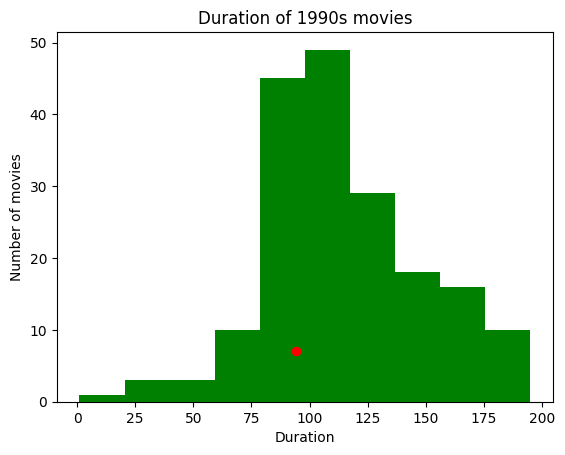

In [16]:
#Representing the info in an histogram

plt.hist(netflix_df_dur_rel90, color ="green")
plt.title("Duration of 1990s movies")
plt.xlabel("Duration")
plt.ylabel("Number of movies")

plt.scatter(duration, frecuency, color="red", zorder=5)

plt.show()

**2.- Number of short action movies released in 1990s**

In [17]:
#First, we filter by the indicated criteria:

netflix_df_filtered = netflix_df[(netflix_df["release_year"]>=1990) & (netflix_df["release_year"]<2000) & (netflix_df["duration"]<90) & (netflix_df["genre"]=="Action")]

#Second,we print the data frame with the colums duration, genre to verify if filter is working properly

netflix_df_short_act = netflix_df_filtered.loc[:,["duration","genre"]]
print(netflix_df_short_act)

         duration   genre
show_id                  
s2039          69  Action
s2708          89  Action
s3718          88  Action
s4787          84  Action
s5299          89  Action
s6114          83  Action
s6330          87  Action


In [18]:
#Third, we can count the number of files of the filtered data frame to know the number of short action movies released in 1990s

short_movie_count = netflix_df_short_act.shape[0]
print(short_movie_count)

7
